In [1]:
import nltk; 
nltk.download('popular')

nltk.download('nps_chat')
nltk.download('webtext')
from nltk.book import *

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/nazarlenisin/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/nazarlenisin/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/nazarlenisin/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/nazarlenisin/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/nazarlenisin/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/nazarlenisin/nltk_data...
[nltk_data]    |   Pack

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Task 1.1

In [2]:
from typing import Generator
import heapq

def unique_words(text: Text, occurance_treshold: int = 5) -> Generator:
    # count words
    words_count = FreqDist(text) # n
    
    # initialize properties for max heap
    valid_words_heap = [] # 1
    word_indentifier = 0 # 1
    
    # construct max heap
    for word, word_count in words_count.items(): # k
        if word_count > occurance_treshold: # 1
            heapq.heappush(valid_words_heap, (-word_count, word_indentifier, word)) # logk
            word_indentifier -= 1 # 1
            
    # traverse max heap
    for _ in range(len(valid_words_heap)): # k
        node = heapq.heappop(valid_words_heap) # logk
        yield -node[0], node[-1] # 1
        
# Time: O( n + k * logk)
# Space: O(k)
# n - amout of tokens in input text
# k - amout of unique workds in input text

list(unique_words(text7))

[(4885, ','),
 (4045, 'the'),
 (3828, '.'),
 (2319, 'of'),
 (2164, 'to'),
 (1878, 'a'),
 (1572, 'in'),
 (1511, 'and'),
 (1123, '*-1'),
 (1099, '0'),
 (965, '*'),
 (864, "'s"),
 (817, 'for'),
 (807, 'that'),
 (806, '*T*-1'),
 (744, '*U*'),
 (718, '$'),
 (717, 'The'),
 (702, '``'),
 (684, "''"),
 (671, 'is'),
 (628, 'said'),
 (490, 'on'),
 (476, 'it'),
 (446, '%'),
 (429, 'by'),
 (402, 'at'),
 (387, 'with'),
 (386, 'from'),
 (385, 'as'),
 (383, 'million'),
 (375, 'Mr.'),
 (372, '*-2'),
 (369, 'are'),
 (367, 'was'),
 (356, 'be'),
 (345, '*T*-2'),
 (339, 'has'),
 (332, 'its'),
 (325, "n't"),
 (323, 'have'),
 (316, 'an'),
 (291, 'or'),
 (281, 'will'),
 (260, 'company'),
 (230, 'he'),
 (230, '--'),
 (225, 'which'),
 (221, 'U.S.'),
 (212, 'year'),
 (210, 'says'),
 (210, 'they'),
 (209, 'would'),
 (206, 'about'),
 (198, 'more'),
 (197, 'In'),
 (197, 'were'),
 (184, 'this'),
 (181, 'their'),
 (180, 'than'),
 (176, 'market'),
 (171, ';'),
 (165, 'had'),
 (165, 'New'),
 (163, 'who'),
 (162, 'trad

Task 1.2

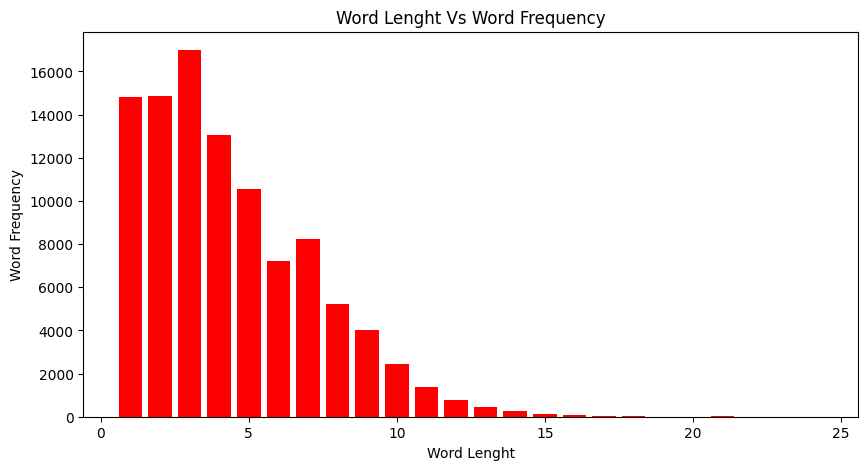

In [12]:
import  matplotlib.pyplot as plt
from collections import ChainMap

def length_to_frequency(text: Text, user_plot_config: dict = None) -> None:
    
    # initialize default bar plot configuration
    plot_config = ChainMap({'figsize': (10,5),
                            'color': 'skyblue',
                            'xlabel': 'Word Lenght',
                            'ylabel': 'Word Frequency',
                            'title': 'Word Lenght Vs Word Frequency'})
    
    # add custom bar plot configuration if plot configuration
    if user_plot_config: plot_config = plot_config.new_child(user_plot_config)
    
    # endge take
    if not text.tokens:
        return 'Tokens list is empty'
    
    # arange required data
    words_length = ((len(token)) for token in text.tokens) # t
    length_count = FreqDist(words_length) # t
    
    # Adjust bar plot
    plt.figure(figsize=plot_config['figsize'])
    plt.bar(length_count.keys(), length_count.values(), color=plot_config['color'])
    plt.xlabel(plot_config['xlabel'])
    plt.ylabel(plot_config['ylabel'])
    plt.title(plot_config['title'])
    plt.show()

length_to_frequency(text7, user_plot_config={'color':'red'})

Task 1.3

In [17]:
from typing import Callable
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter

# type alias fot sentence, word tokenized to follow OCP, DI
SentenceTokenizer = Callable[[str], list]
WordTokenizer = Callable[[list], list]


# idea based on Bridge Structural Desing Pattern
class MostCommonEndTokens:
    
    __slots__ = 'text', 'sentence_tokenizer', 'word_tokenizer' # remove dynamic array which allocate extra memory
    
    def __init__(self, 
                 text: str,
                 sentence_tokenizer: SentenceTokenizer = sent_tokenize,
                 word_tokenizer: WordTokenizer = word_tokenize
                 ) -> None:
        
        self.text = text
        self.sentence_tokenizer = sentence_tokenizer
        self.word_tokenizer = word_tokenizer
    
    @property
    def end_tokens(self):
        sentences = self.sentence_tokenizer(self.text)
        for sentence in sentences:
            words = self.word_tokenizer(sentence)
            
            if len(words) > 1:
                yield words[-2]
    
    def most_common(self, n_common: int = 10):
        return Counter(self.end_tokens).most_common(n_common)
        
        
    def __repr__(self): 
        return f"MostCommonEndTokens(sentence_tokenizer={self.sentence_tokenizer}), word_tokenizer=({self.word_tokenizer})"
        


text = """Natural Language Processing is amazing. The AI revolution is here. 
People are excited about AI. Machines are learning faster than ever. 
What does the future hold? AI is transforming industries."""

model = MostCommonEndTokens(text)
model.most_common(2)


[('amazing', 1), ('here', 1)]

Task 2

In [22]:
import logging

class CustomText:
    def __init__(self,
                 file_path: str,
                 tokenizer: WordTokenizer = word_tokenize
                 ) -> None:
        
        read_text = self._from_txt(file_path)
        self._tokenized_text = tokenizer(read_text) if read_text else None
        self.tokenizer = tokenizer
        
        
    def _from_txt(self, file_path: str) -> str | None:
        try:
            with open(file_path, 'r') as file_object:
                return file_object.read()
            
        except Exception as e:
            logging.exception(e)
            return None
        
    
    def get_text(self):
        return nltk.Text(self._tokenized_text) if self._tokenized_text else 'Text can not be initialized'

    def __repr__(self) -> str:
        return f"CustomText(tokenizer={self.tokenizer})"
        
        
text = CustomText('/Users/nazarlenisin/Desktop/NLP_CV_UNIVERSITY/NLP/Lab1/custom_text.txt')
text = text.get_text()

In [21]:
text.concordance('FANG-level')

Displaying 2 of 2 matches:
 Your implementation : Meets many FANG-level expectations : clean design , use
putation . Well within reach of a FANG-level intern , but refining edge case h


In [7]:
text.similar('implementation')

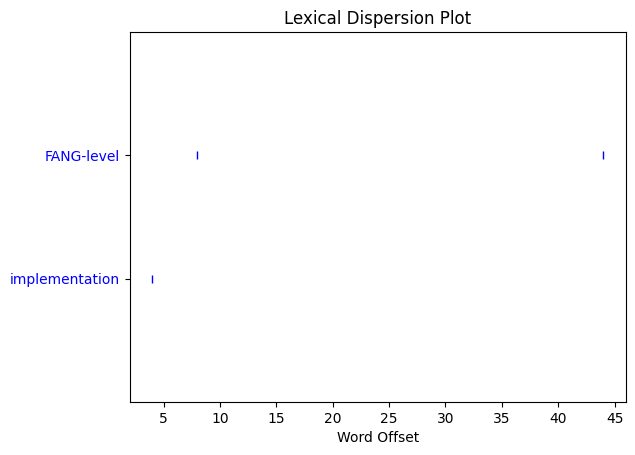

In [8]:
text.dispersion_plot(['FANG-level', 'implementation'])

In [9]:
nltk.FreqDist(text).most_common(10)

[(',', 4),
 ('and', 4),
 (':', 3),
 ('.', 3),
 ('FANG-level', 2),
 ('of', 2),
 ('edge', 2),
 ('Final', 1),
 ('Evaluation', 1),
 ('Your', 1)]